<a href="https://colab.research.google.com/github/IsaiahejWashington/MLA_IEW/blob/main/FinalProject_Classification_IEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
Isaiah Washington

## Standard Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [67]:
#example - you will replace this with the models you are actually using.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

## Imports for Splitting Data and Building Pipeline


In [68]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [70]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [71]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [72]:
df = pd.read_csv('/content/gdrive/MyDrive/cs405/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [73]:
numerical_summary = df.describe()
print(numerical_summary)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

### Statistical and Visual Exploration

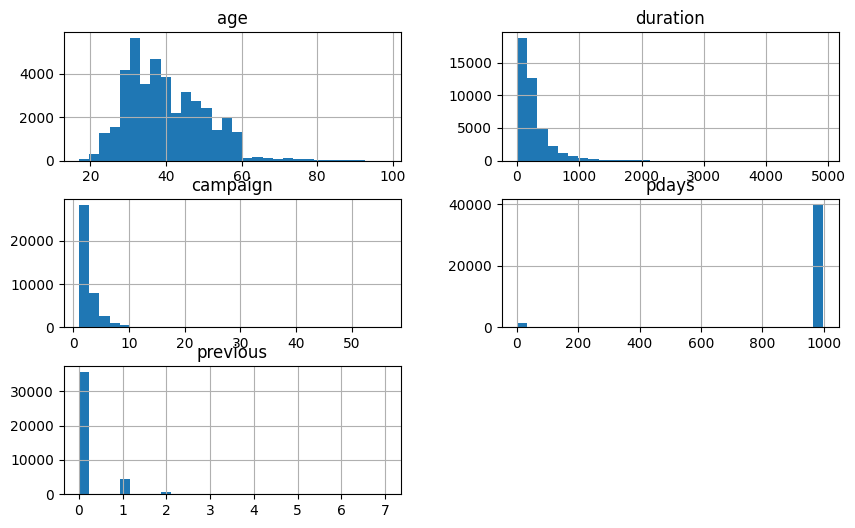

In [74]:
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous']
df[numerical].hist(bins=30, figsize=(10, 6))
plt.show()

In [75]:
numerical_summary = df.describe()
print(numerical_summary)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

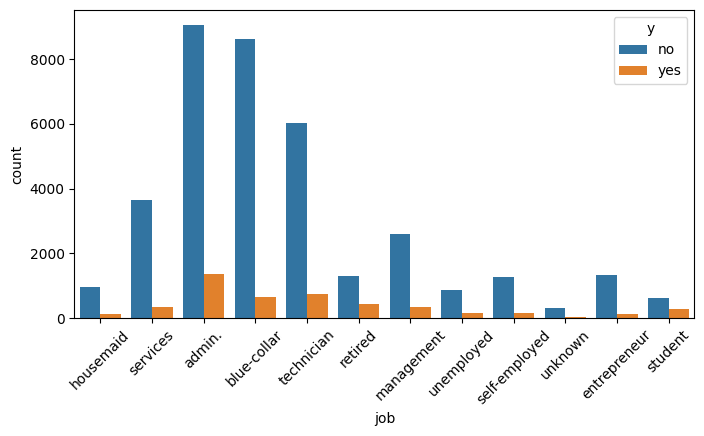

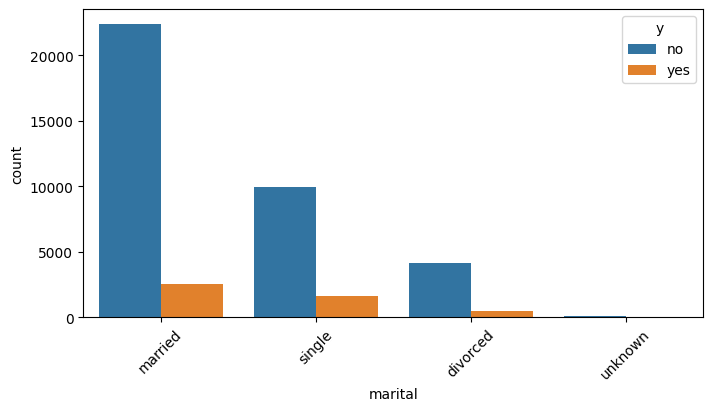

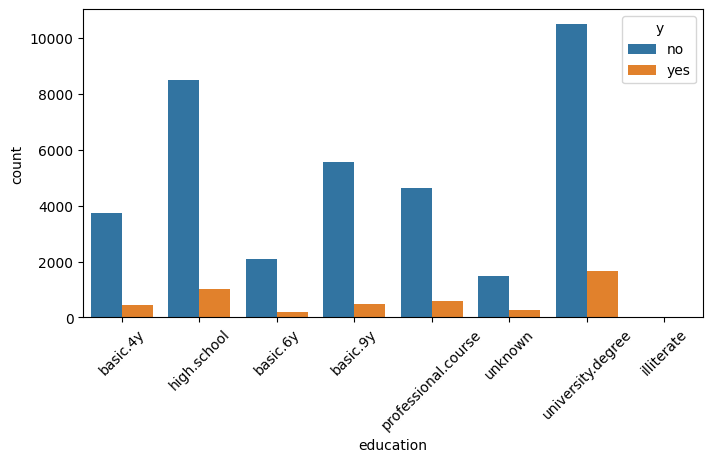

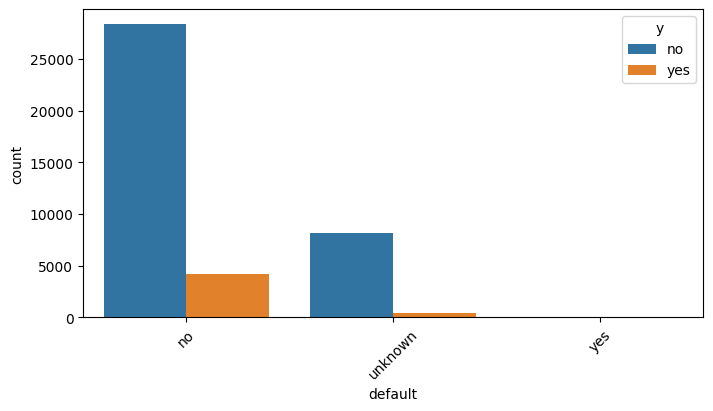

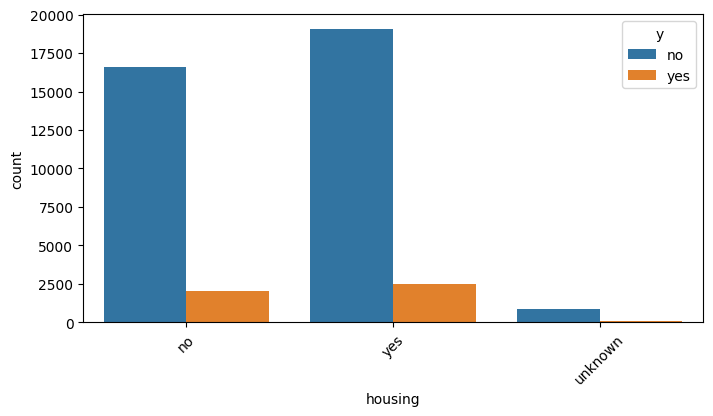

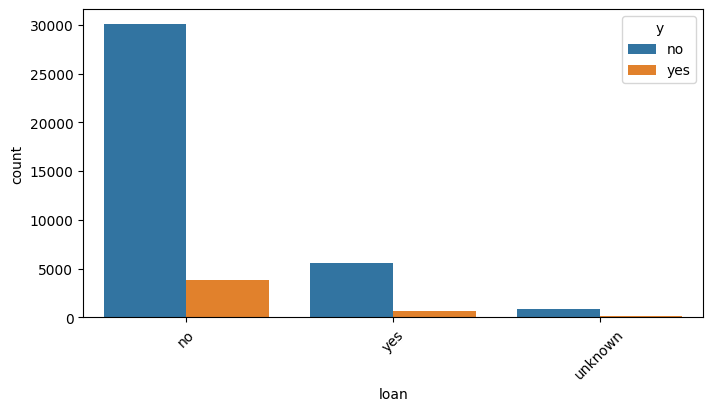

In [76]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in categorical:
  plt.figure(figsize=(8, 4))
  sns.countplot(x=col, hue='y', data=df)
  plt.xticks(rotation=45)
  plt.show()

### Splitting Data into Train/Test

In [77]:
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [78]:
num_attributes = ['age', 'duration', 'campaign', 'pdays', 'previous']
cat_attributes = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(drop='first'), cat_attributes)
    ])

### Building the Pipeline

In [79]:
logReg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=32))
])

logReg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=32))])

In [80]:
logReg_pipeline.fit(X_train, y_train)
y_pred_logReg = logReg_pipeline.predict(X_test)

In [81]:
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [10, None],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    rf_pipe,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, None],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100]},
             scoring='f1', verbose=1)

In [82]:
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

### Executing the Model

In [83]:
def plot_cm(y_test, y_pred_logReg):
    cm = confusion_matrix(y_test,y_pred_rf)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.show()

### Evaluating Model

In [84]:
print("Classification Report:")
print(classification_report(y_test, y_pred_logReg))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7280
           1       0.66      0.36      0.47       958

    accuracy                           0.90      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [85]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7280
           1       0.68      0.38      0.49       958

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



### Conclusion
Rf is slightly more accurate but only by a percentage. The randon forest model outpaces logistic regression. However this model produced low recall scores. This could result in businesses using this model to miss opportunities due to poor predictions.

## Problem 2

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.